#### Linear Regression

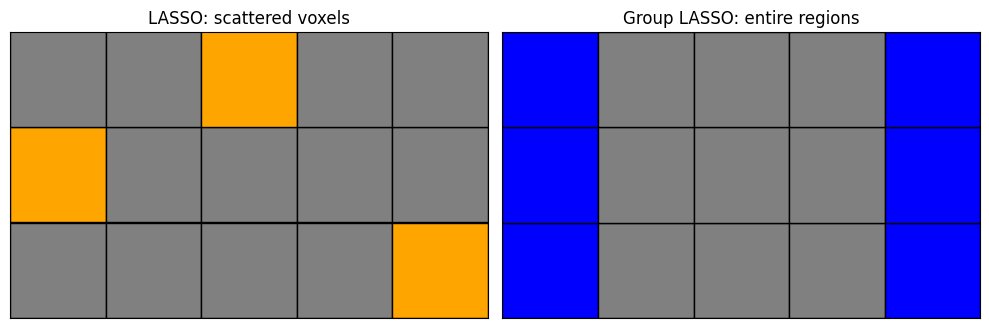

In [1]:
#Question 04

import matplotlib.pyplot as plt

def plot_voxel_grid(ax, selected=None, title="", group_indices=None):
    """
    Draws a 5x3 voxel grid and highlights selected voxels or voxel groups.

    Parameters:
    ax (matplotlib axis): axis to plot on
    selected (list of tuples): list of voxel coordinates selected (for LASSO)
    title (str): title of the subplot
    group_indices (list of lists): list of voxel groups (for Group LASSO)
    """
    for x in range(5):
        for y in range(3):
            color = 'gray'  # default voxel color
            
            # Highlight individual selected voxels (LASSO)
            if selected is not None and (x, y) in selected:
                color = 'orange'
            
            # Highlight grouped voxels (Group LASSO)
            if group_indices is not None:
                for group in group_indices:
                    if (x, y) in group:
                        color = 'blue'
            
            rect = plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black')
            ax.add_patch(rect)
    
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 3)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

# --- Example usage ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Define groups (brain regions)
group1 = [(0,0),(0,1),(0,2)]
group2 = [(2,0),(2,1),(2,2)]
group3 = [(4,0),(4,1),(4,2)]

# LASSO: picks scattered voxels
lasso_selected = [(0,1), (2,2), (4,0)]

# Group LASSO: selects whole groups (regions)
group_lasso_selected = [group1, group3]

# Plot results
plot_voxel_grid(axes[0], selected=lasso_selected, title='LASSO: scattered voxels')
plot_voxel_grid(axes[1], group_indices=group_lasso_selected, title='Group LASSO: entire regions')

plt.tight_layout()
plt.show()


### Logistic Regression

In [53]:
#Question 01
import seaborn as sns
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import LabelEncoder
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import accuracy_score
# Load the penguins dataset
df = sns . load_dataset ("penguins")
df. dropna ( inplace = True )
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species']. isin ( selected_classes )]. copy ()
# Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder ()
# Encode the species column
y_encoded = le. fit_transform ( df_filtered ['species'])
df_filtered ['class_encoded'] = y_encoded
# Display the filtered and encoded DataFrame
print ( df_filtered [[ 'species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered ['class_encoded'] # Target variable
X = df_filtered . drop ([ 'class_encoded'], axis =1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [54]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X, y,
test_size =0.2 , random_state =42)
#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression (solver ='saga')
logreg . fit ( X_train , y_train )
# Predict on the testing data
y_pred = logreg . predict (X_test)
# Evaluate the model
accuracy = accuracy_score (y_test , y_pred)
print ("Accuracy :", accuracy)
print ( logreg.coef_ , logreg.intercept_)

ValueError: could not convert string to float: 'Adelie'

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Identify categorical and numeric columns
categorical = ["island", "sex"]
numeric = X.columns.difference(categorical)

# Preprocess: One-hot encode categorical, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline with preprocessing + model
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="saga", max_iter=5000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8208955223880597


c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Identify categorical and numeric columns
categorical = ["island", "sex"]
numeric = X.columns.difference(categorical)

# Preprocess: One-hot encode categorical, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline with preprocessing + model
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", max_iter=5000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag

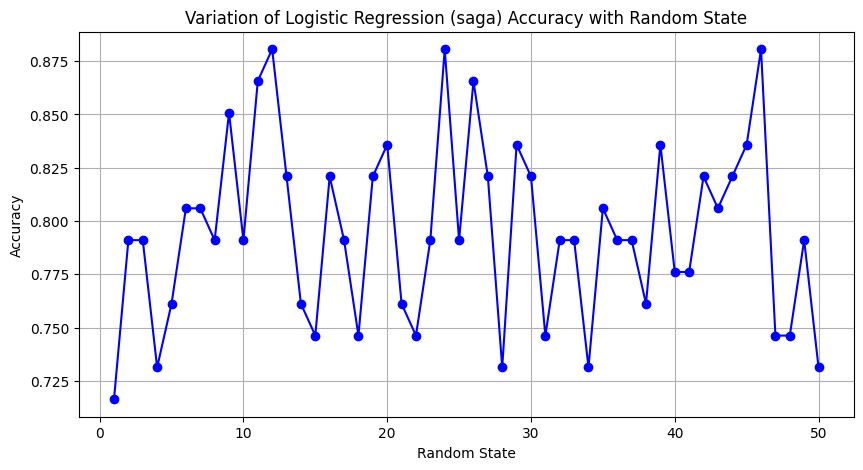

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Identify categorical and numeric columns
categorical = ["island", "sex"]
numeric = X.columns.difference(categorical)

# Preprocess: One-hot encode categorical, keep numeric as is
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline with preprocessing + model
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="saga", max_iter=5000))
])

# Range of random_state values to test
random_states = range(1, 51)  # 1 to 50
accuracies = []

# Train and evaluate for each random_state
for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs random_state
plt.figure(figsize=(10, 5))
plt.plot(random_states, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.title("Variation of Logistic Regression (saga) Accuracy with Random State")
plt.grid(True)
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Identify categorical and numeric columns
categorical = ["island", "sex"]
numeric = X.columns.difference(categorical)

# Preprocess: One-hot encode categorical, scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

# Build pipeline with preprocessing + model
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="saga", max_iter=5000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy with scaling (SAGA):", accuracy_score(y_test, y_pred))


Accuracy with scaling (SAGA): 1.0


In [7]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("species", axis=1)
y = df["species"]

# Identify categorical and numeric columns
categorical = ["island", "sex"]
numeric = X.columns.difference(categorical)

# Preprocess: One-hot encode categorical, scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

# Build pipeline with preprocessing + model
logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", max_iter=5000))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
print("Accuracy with scaling (LIBLINEAR):", accuracy_score(y_test, y_pred))


Accuracy with scaling (LIBLINEAR): 1.0


c:\Users\Nilani Thushanthika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


### Logistic regression First/Second-Order Methods

In [42]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs
# Generate synthetic data
np. random . seed (0)
centers = [[ -5 , 0], [5, 1.5]]
X, y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np. dot (X, transformation )

In [43]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

# Add bias
X_b = np.c_[np.ones(X.shape[0]), X]
w = np.zeros(X_b.shape[1])  # Initialize weights to zeros
lr = 0.1  # Learning rate
losses_gd = []

for iter in range(20):
    y_pred = sigmoid(X_b @ w)
    grad = (X_b.T @ (y_pred - y)) / len(y)
    w -= lr * grad
    losses_gd.append(log_loss(y, y_pred))
    print(f"Iteration {iter+1}: Weights = {w}, Loss = {losses_gd[-1]}")

print("\nFinal weights:", w)


Iteration 1: Weights = [0.         0.10585709 0.18203713], Loss = 0.6931471805599435
Iteration 2: Weights = [-0.00347943  0.17058513  0.27733096], Loss = 0.3552895867327753
Iteration 3: Weights = [-0.00751785  0.21805237  0.34013409], Loss = 0.24465211598824774
Iteration 4: Weights = [-0.01149835  0.25616947  0.38691355], Loss = 0.19006889536170782
Iteration 5: Weights = [-0.01528425  0.28831956  0.42416834], Loss = 0.15697873091713807
Iteration 6: Weights = [-0.01885265  0.31628173  0.45510574], Loss = 0.13452489841559628
Iteration 7: Weights = [-0.02221227  0.34111832  0.48154389], Loss = 0.11817077072310227
Iteration 8: Weights = [-0.02538028  0.36351978  0.50461376], Loss = 0.10566573437902194
Iteration 9: Weights = [-0.02837509  0.38396285  0.52506714], Loss = 0.09575827374841728
Iteration 10: Weights = [-0.03121392  0.40279198  0.54342935], Loss = 0.08769331101788153
Iteration 11: Weights = [-0.0339122   0.42026494  0.56008201], Loss = 0.08098648480933403
Iteration 12: Weights = 

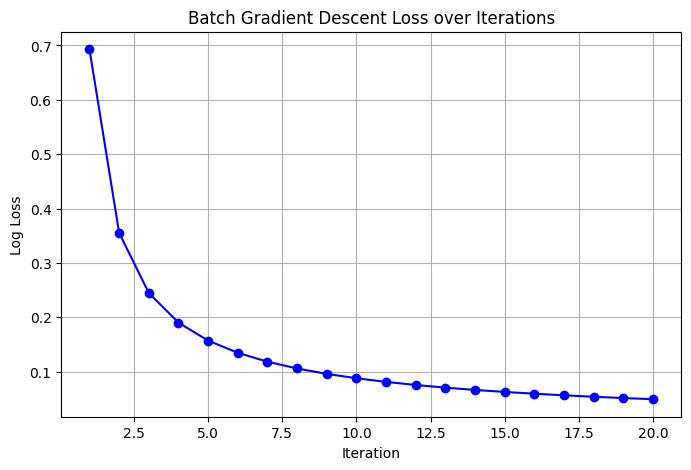

In [44]:
# Plot the loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), losses_gd, marker='o', color='blue')
plt.title('Batch Gradient Descent Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

In [45]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, y_pred):
    # Add small epsilon to avoid log(0)
    return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

# Add bias term
X_b = np.c_[np.ones(X.shape[0]), X]
w = np.zeros(X_b.shape[1])  # Initialize weights to zeros
losses_newton = []

for iter in range(20):
    y_pred = sigmoid(X_b @ w)
    grad = (X_b.T @ (y_pred - y)) / len(y)
    S = np.diag(y_pred * (1 - y_pred))
    hessian = (X_b.T @ S @ X_b) / len(y)
    w -= np.linalg.inv(hessian) @ grad
    loss = log_loss(y, y_pred)
    losses_newton.append(loss)
    print(f"Iteration {iter+1}: Weights = {w}, Loss = {loss}")

print("\nFinal weights:", w)


Iteration 1: Weights = [-0.03981141  0.53868061  0.21434947], Loss = 0.6931471805599435
Iteration 2: Weights = [-0.05813822  0.86912155  0.34584955], Loss = 0.1452194600412546
Iteration 3: Weights = [-0.07164534  1.18937095  0.47299785], Loss = 0.052758061110461114
Iteration 4: Weights = [-0.08272078  1.51681649  0.6022525 ], Loss = 0.020310025600944786
Iteration 5: Weights = [-0.09419423  1.8586337   0.73584965], Loss = 0.00800410011594186
Iteration 6: Weights = [-0.11060199  2.21993607  0.87500272], Loss = 0.0032032076244749292
Iteration 7: Weights = [-0.13885827  2.60588057  1.0208919 ], Loss = 0.0013004481503952755
Iteration 8: Weights = [-0.18822878  3.02223642  1.17542502], Loss = 0.0005360101407728004
Iteration 9: Weights = [-0.26917876  3.47496238  1.34202112], Loss = 0.0002241146529652012
Iteration 10: Weights = [-0.39106801  3.96882789  1.52586885], Loss = 9.455166361028875e-05
Iteration 11: Weights = [-0.55903017  4.50564297  1.73260271], Loss = 3.982411945511297e-05
Iterati

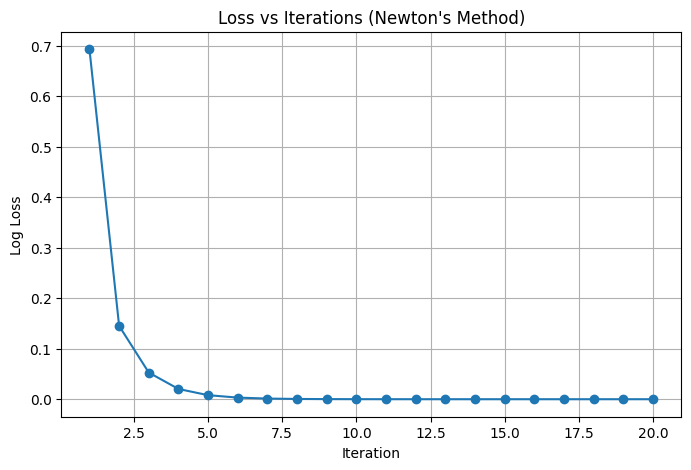

In [46]:
import matplotlib.pyplot as plt

# Plot the loss vs iterations
plt.figure(figsize=(8,5))
plt.plot(range(1, len(losses_newton)+1), losses_newton, marker='o')
plt.title("Loss vs Iterations (Newton's Method)")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()


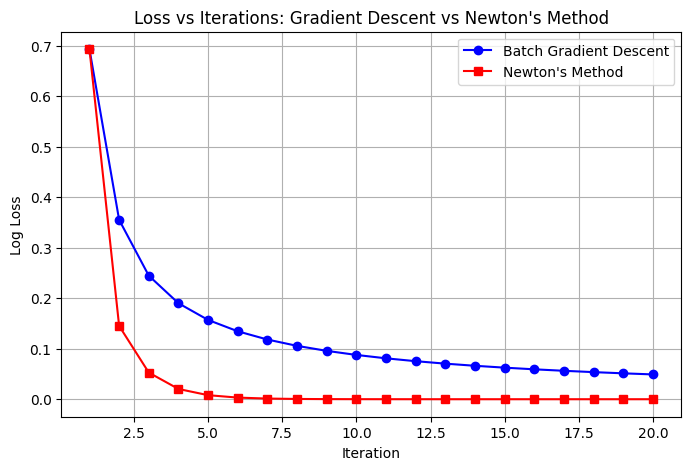

In [47]:
# Plot both losses in one figure
plt.figure(figsize=(8,5))
plt.plot(range(1, len(losses_gd)+1), losses_gd, marker='o', color='blue', label="Batch Gradient Descent")
plt.plot(range(1, len(losses_newton)+1), losses_newton, marker='s', color='red', label="Newton's Method")
plt.title("Loss vs Iterations: Gradient Descent vs Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs
# Generate synthetic data
np. random . seed (0)
centers_new = [[ 2 , 2], [5, 1.5]]
X, y = make_blobs ( n_samples =2000 , centers = centers_new , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np. dot (X, transformation )

# Add bias term (X_b)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # bias term

In [49]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def batch_gradient_descent(X_b, y, lr=0.1, iterations=20):
    w = np.zeros(X_b.shape[1])
    losses = []

    for i in range(iterations):
        y_pred = sigmoid(X_b @ w)
        grad = (X_b.T @ (y_pred - y)) / len(y)
        w -= lr * grad  # update weights
        loss = log_loss(y, y_pred)
        losses.append(loss)
        print(f"Iteration {i+1}: Loss = {loss:.4f}, Weights = {w}")
    
    return w, losses


In [50]:
# Run BGD on new dataset
w_new, losses_new = batch_gradient_descent(X_b, y, lr=0.1, iterations=20)


Iteration 1: Loss = 0.6931, Weights = [0.         0.04335709 0.01953713]
Iteration 2: Loss = 0.6728, Weights = [-0.0030827   0.08277972  0.02429638]
Iteration 3: Loss = 0.6575, Weights = [-0.0074457   0.11990126  0.02322412]
Iteration 4: Loss = 0.6438, Weights = [-0.01236164  0.15540527  0.0199121 ]
Iteration 5: Loss = 0.6311, Weights = [-0.01753297  0.18959586  0.01581408]
Iteration 6: Loss = 0.6192, Weights = [-0.02283593  0.22262446  0.01152011]
Iteration 7: Loss = 0.6080, Weights = [-0.02821791  0.25457995  0.00726695]
Iteration 8: Loss = 0.5974, Weights = [-0.03365566  0.28552498  0.00314599]
Iteration 9: Loss = 0.5876, Weights = [-0.03913809  0.31551057 -0.00081119]
Iteration 10: Loss = 0.5782, Weights = [-0.04465919  0.34458208 -0.00459749]
Iteration 11: Loss = 0.5695, Weights = [-0.05021515  0.37278156 -0.00821564]
Iteration 12: Loss = 0.5612, Weights = [-0.05580306  0.40014869 -0.0116721 ]
Iteration 13: Loss = 0.5534, Weights = [-0.06142052  0.42672114 -0.01497458]
Iteration 1

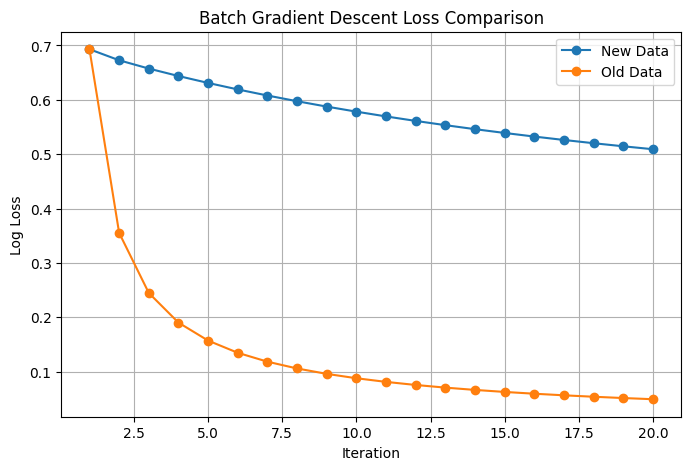

In [51]:
# Plot comparison
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses_new)+1), losses_new, marker='o', label='New Data')
plt.plot(range(1, len(losses_gd)+1), losses_gd, marker='o', label='Old Data')
plt.title("Batch Gradient Descent Loss Comparison")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()
